## Building SVM - Support Vector Machine

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import keras # to build Neural Network

Using TensorFlow backend.


## Load Data

In [2]:
path = 'Dataset'
CATEGORIES = [
            '0','1','2','3','4','5','6','7','8','9',    
            'ກ','ຂ','ຄ','ງ','ຈ','ສ','ຊ','ຍ','ດ','ຕ','ຖ',
            'ທ','ນ','ບ','ປ','ຜ','ຝ','ພ','ຟ','ມ','ຢ','ລ',
            'ວ','ຫ','ອ','ຮ','ໜ','ໝ','ຣ','ະ','ັ','າ','ິ','ີ','ຶ',
            'ື','ຸ','ູ','ົ','ຫຼ','ຽ','ເ','ແ','ໂ','ໃ','ໄ','ໆ','່','້','໊','໋','໌','ໍ',
            ]
IMG_SIZE=32

In [3]:
classNo = []
image = []
myList = os.listdir(path)
# print(myList)
noOfClasses = len(myList)

for x in myList:
    myPiclist = os.listdir(path+"/"+str(x))
    for y in myPiclist:
        # img = (path+"/"+str(x)+"/"+y)
        curImg = cv2.imread(path+"/"+str(x)+"/"+str(y))
        curImg = cv2.resize(curImg,(32,32))
        image.append([curImg,x])
        # classNo.append(x)
    print(x, end=' ')
print(' ')

0 1 10 11 12 13 14 15 16 17 18 19 2 20 21 22 23 24 25 26 27 28 29 3 30 31 32 33 34 35 36 37 38 39 4 40 41 42 43 44 45 46 47 48 49 5 50 51 52 53 54 55 56 57 58 59 6 60 61 62 7 8 9  


In [4]:
X=[]
y=[]

for categories, label in image:
    X.append(categories)
    y.append(label)
X = np.array(X).reshape(len(image),-1)

In [5]:
X = X/255.0

In [6]:
y=np.array(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y.astype(np.float64),test_size=0.2)

In [8]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [9]:
model_svc = SVC(kernel='poly',gamma='auto')
model_svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

In [10]:
y_pred_svc = model_svc.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print("Accuracy SVM is",accuracy_score(y_test,y_pred_svc))

Accuracy SVM is 0.7518424036281179


In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_SVN = confusion_matrix(y_test,y_pred_svc)
cm_SVN

array([[305,   2,   0, ...,   0,   1,   2],
       [  0, 306,   0, ...,   0,   0,   0],
       [  0,   7, 297, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  95,  67,  22],
       [  0,   0,   0, ...,  25, 147,  13],
       [  0,   0,   0, ...,   4,   1, 254]], dtype=int64)

<AxesSubplot:>

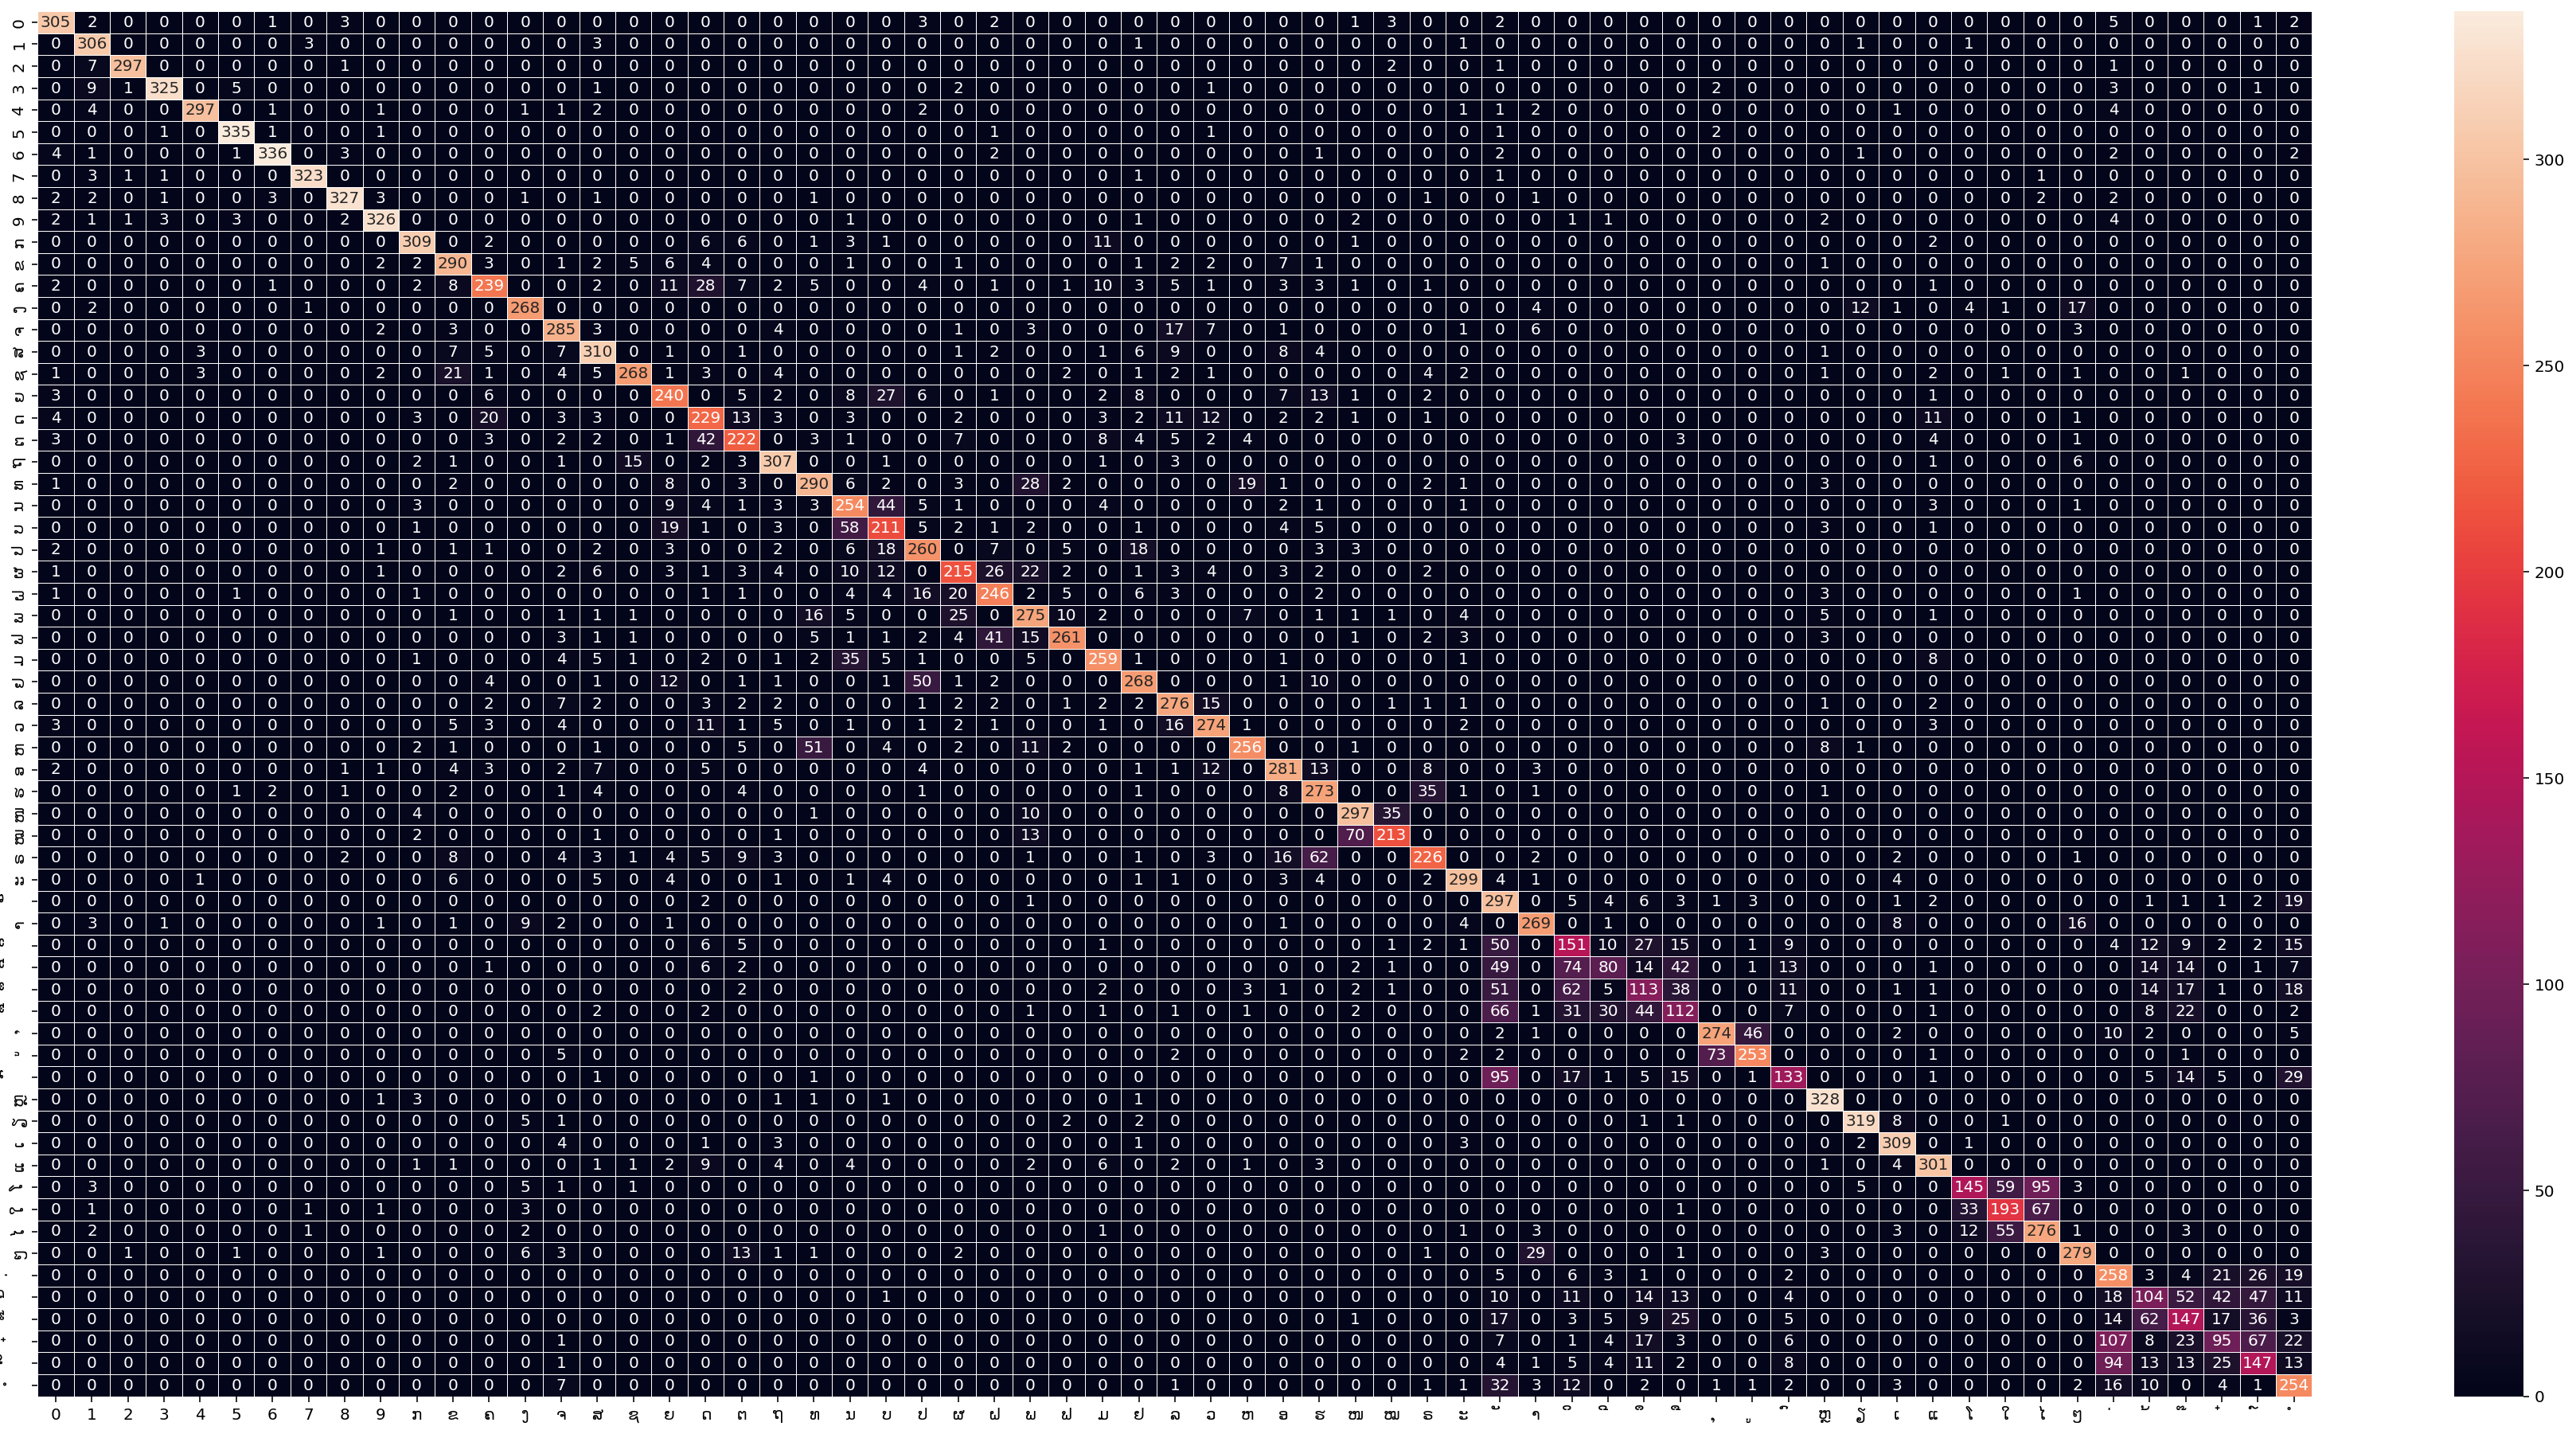

In [13]:
plt.figure(figsize=(32,16))
sns.heatmap(cm_SVN, annot=True, fmt='d', linewidths=.5,xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [15]:
from sklearn.metrics import classification_report
print("SVM",classification_report(y_test,y_pred_svc, target_names=CATEGORIES))

SVM               precision    recall  f1-score   support

           0       0.91      0.92      0.92       330
           1       0.88      0.97      0.92       316
           2       0.99      0.96      0.97       309
           3       0.98      0.93      0.95       350
           4       0.98      0.93      0.95       318
           5       0.97      0.98      0.97       343
           6       0.97      0.95      0.96       355
           7       0.98      0.98      0.98       331
           8       0.96      0.94      0.95       347
           9       0.95      0.93      0.94       350
           ກ       0.92      0.90      0.91       342
           ຂ       0.80      0.88      0.84       331
           ຄ       0.82      0.70      0.75       341
           ງ       0.89      0.86      0.88       310
           ຈ       0.80      0.85      0.82       336
           ສ       0.82      0.85      0.83       366
           ຊ       0.91      0.81      0.86       331
           ຍ       0.74

In [16]:
model_svc_linear = SVC(kernel='linear',gamma='auto')
model_svc_linear.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [17]:
y_pred_svc_linear = model_svc_linear.predict(X_test)

In [18]:
print("Accuracy SVM kernael linear is",accuracy_score(y_test,y_pred_svc_linear))

Accuracy SVM kernael linear is 0.9068405139833712


In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_SVN_linear = confusion_matrix(y_test,y_pred_svc_linear)
cm_SVN_linear

array([[328,   1,   0, ...,   0,   0,   0],
       [  0, 314,   0, ...,   0,   0,   0],
       [  0,   0, 307, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 247,  13,   3],
       [  0,   0,   0, ...,  27, 210,   3],
       [  0,   0,   0, ...,   1,   0, 297]], dtype=int64)

<AxesSubplot:>

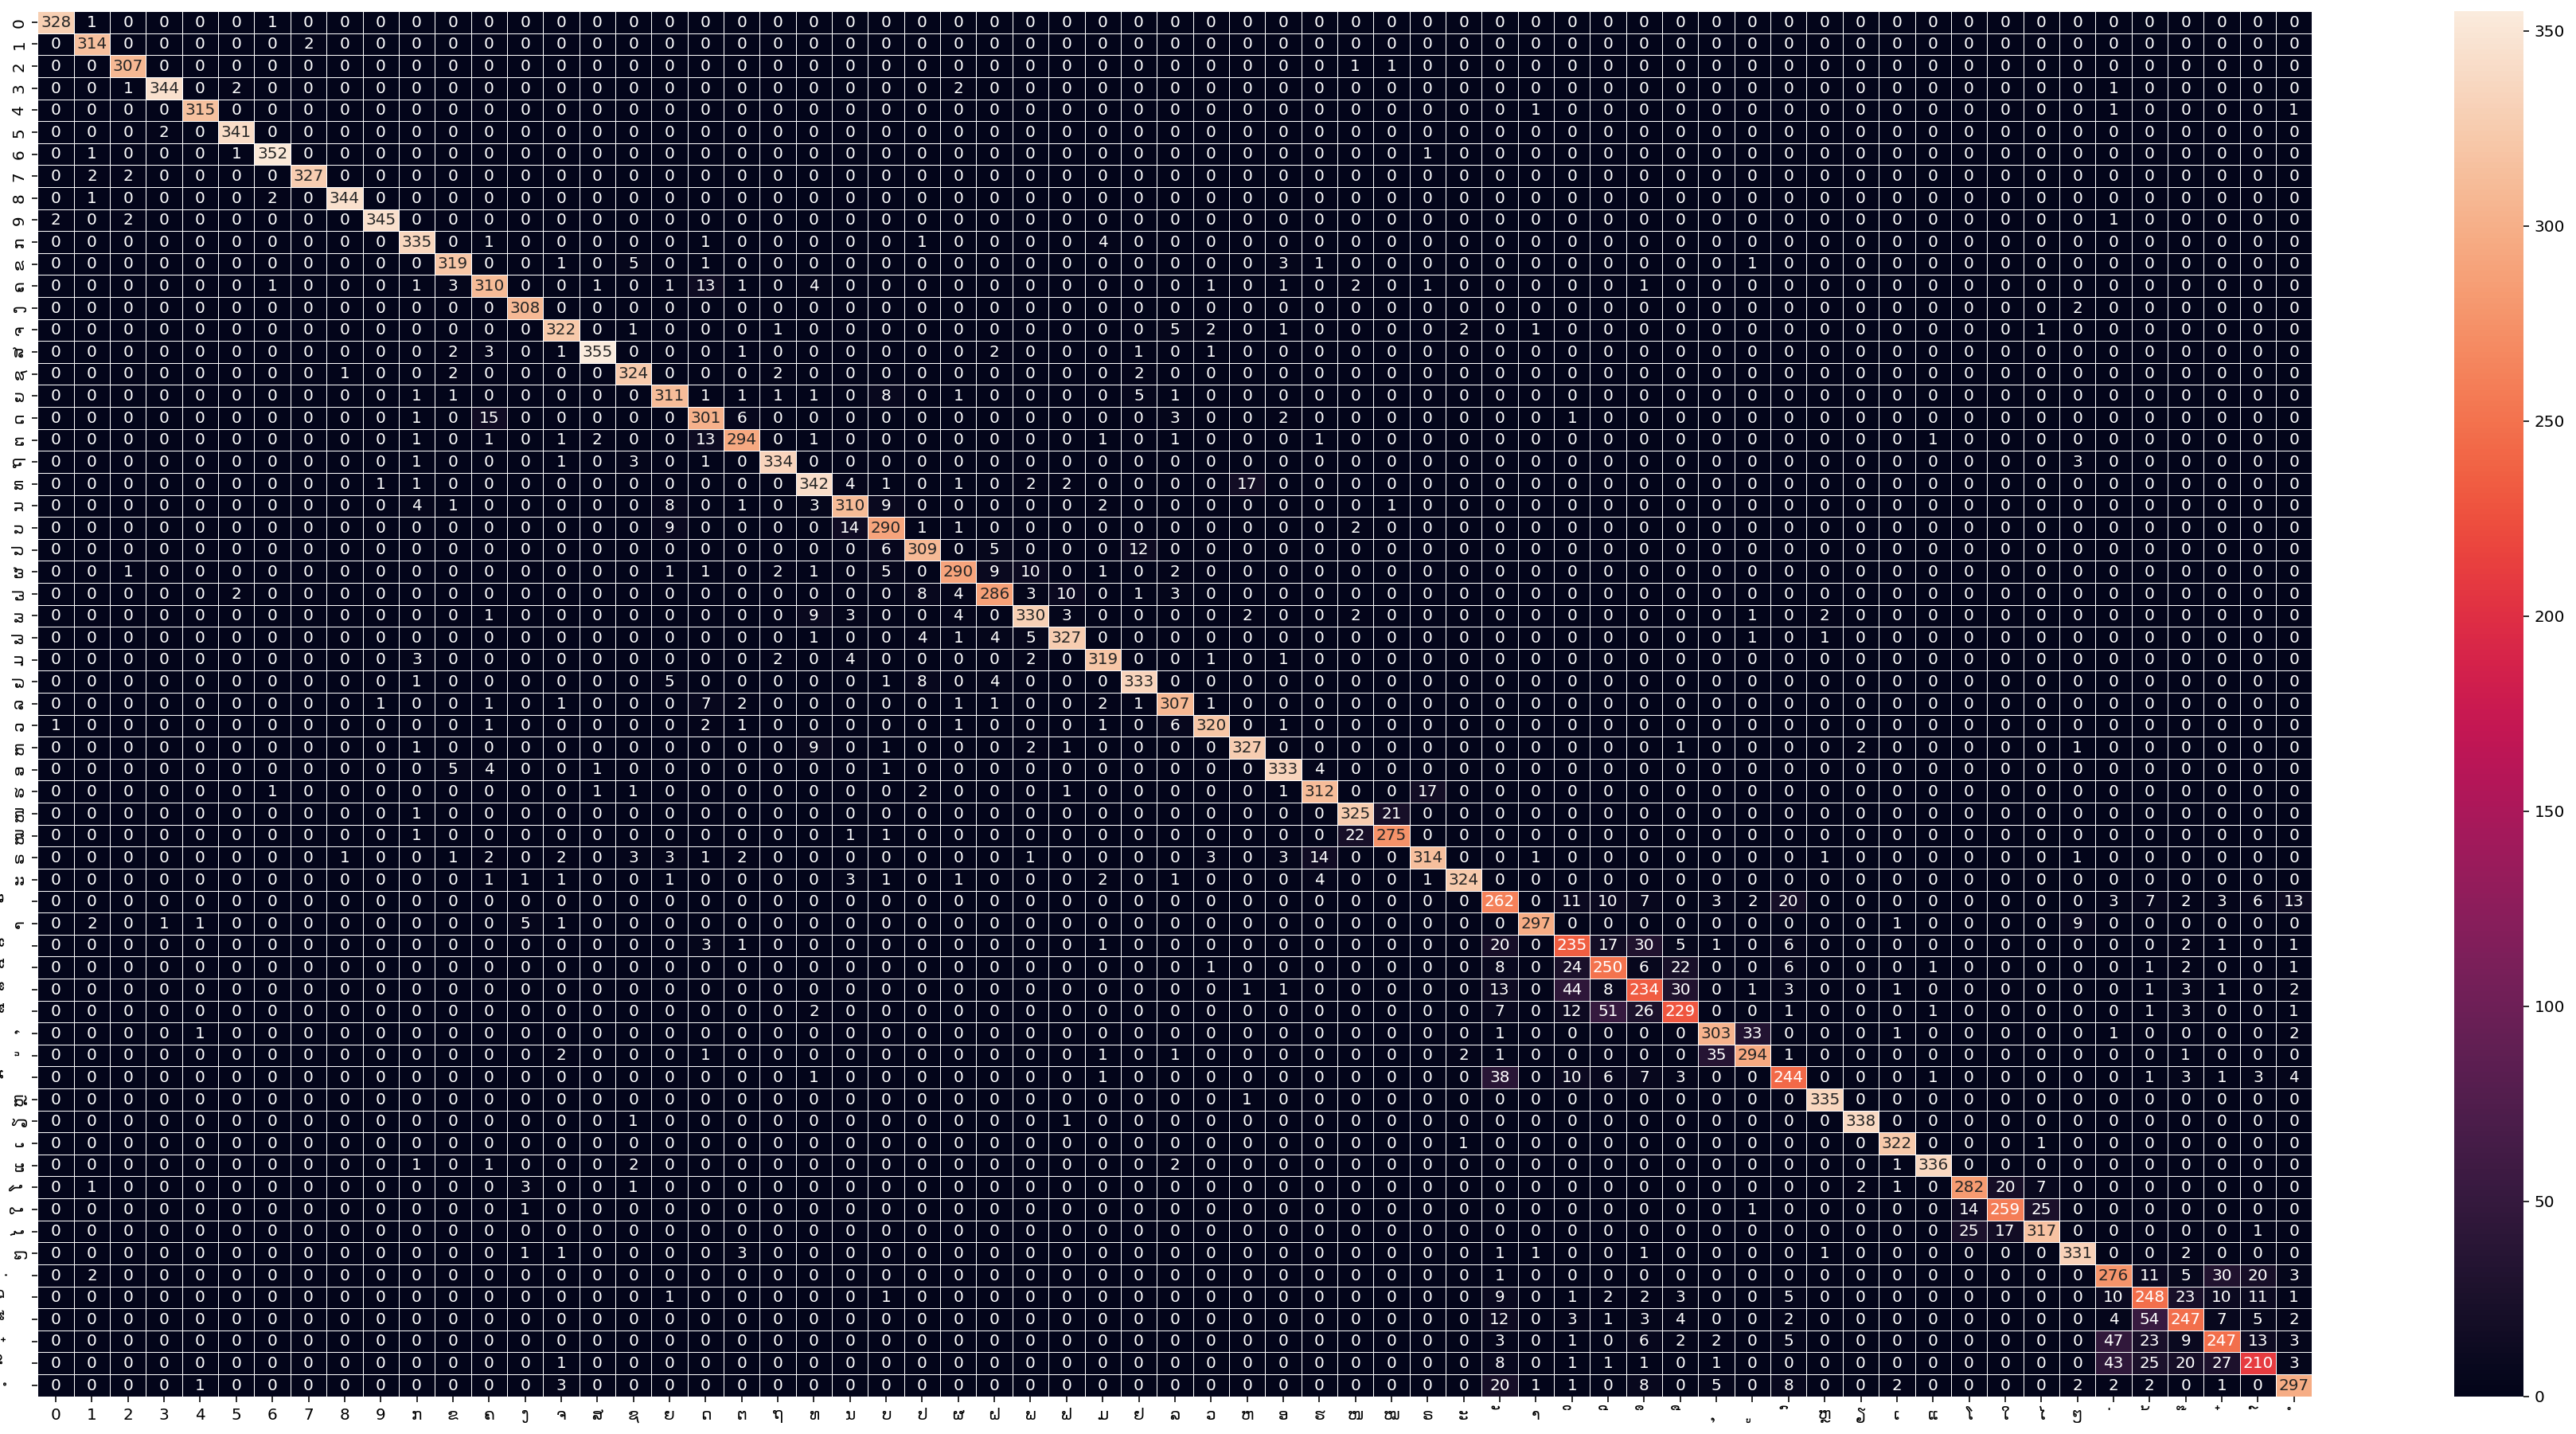

In [20]:
plt.figure(figsize=(32,16))
sns.heatmap(cm_SVN_linear, annot=True, fmt='d', linewidths=.5,xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [21]:
print("SVM_linear",classification_report(y_test,y_pred_svc_linear, target_names=CATEGORIES))

SVM_linear               precision    recall  f1-score   support

           0       0.99      0.99      0.99       330
           1       0.97      0.99      0.98       316
           2       0.98      0.99      0.99       309
           3       0.99      0.98      0.99       350
           4       0.99      0.99      0.99       318
           5       0.99      0.99      0.99       343
           6       0.99      0.99      0.99       355
           7       0.99      0.99      0.99       331
           8       0.99      0.99      0.99       347
           9       0.99      0.99      0.99       350
           ກ       0.95      0.98      0.96       342
           ຂ       0.96      0.96      0.96       331
           ຄ       0.91      0.91      0.91       341
           ງ       0.97      0.99      0.98       310
           ຈ       0.95      0.96      0.96       336
           ສ       0.99      0.97      0.98       366
           ຊ       0.95      0.98      0.96       331
           ຍ    

# -------------------------------------

## KNN Model

In [22]:
model_knn=KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred_knn=model_knn.predict(X_test)
print("Accuracy KNN is",accuracy_score(y_test,y_pred_knn))

Accuracy KNN is 0.8739134542705971


In [24]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[317,   0,   0, ...,   0,   0,   1],
       [  1, 311,   0, ...,   0,   0,   0],
       [  2,   1, 302, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 335,   3,   5],
       [  0,   0,   0, ...,   9, 294,  12],
       [  0,   0,   0, ...,   5,   0, 339]], dtype=int64)

<AxesSubplot:>

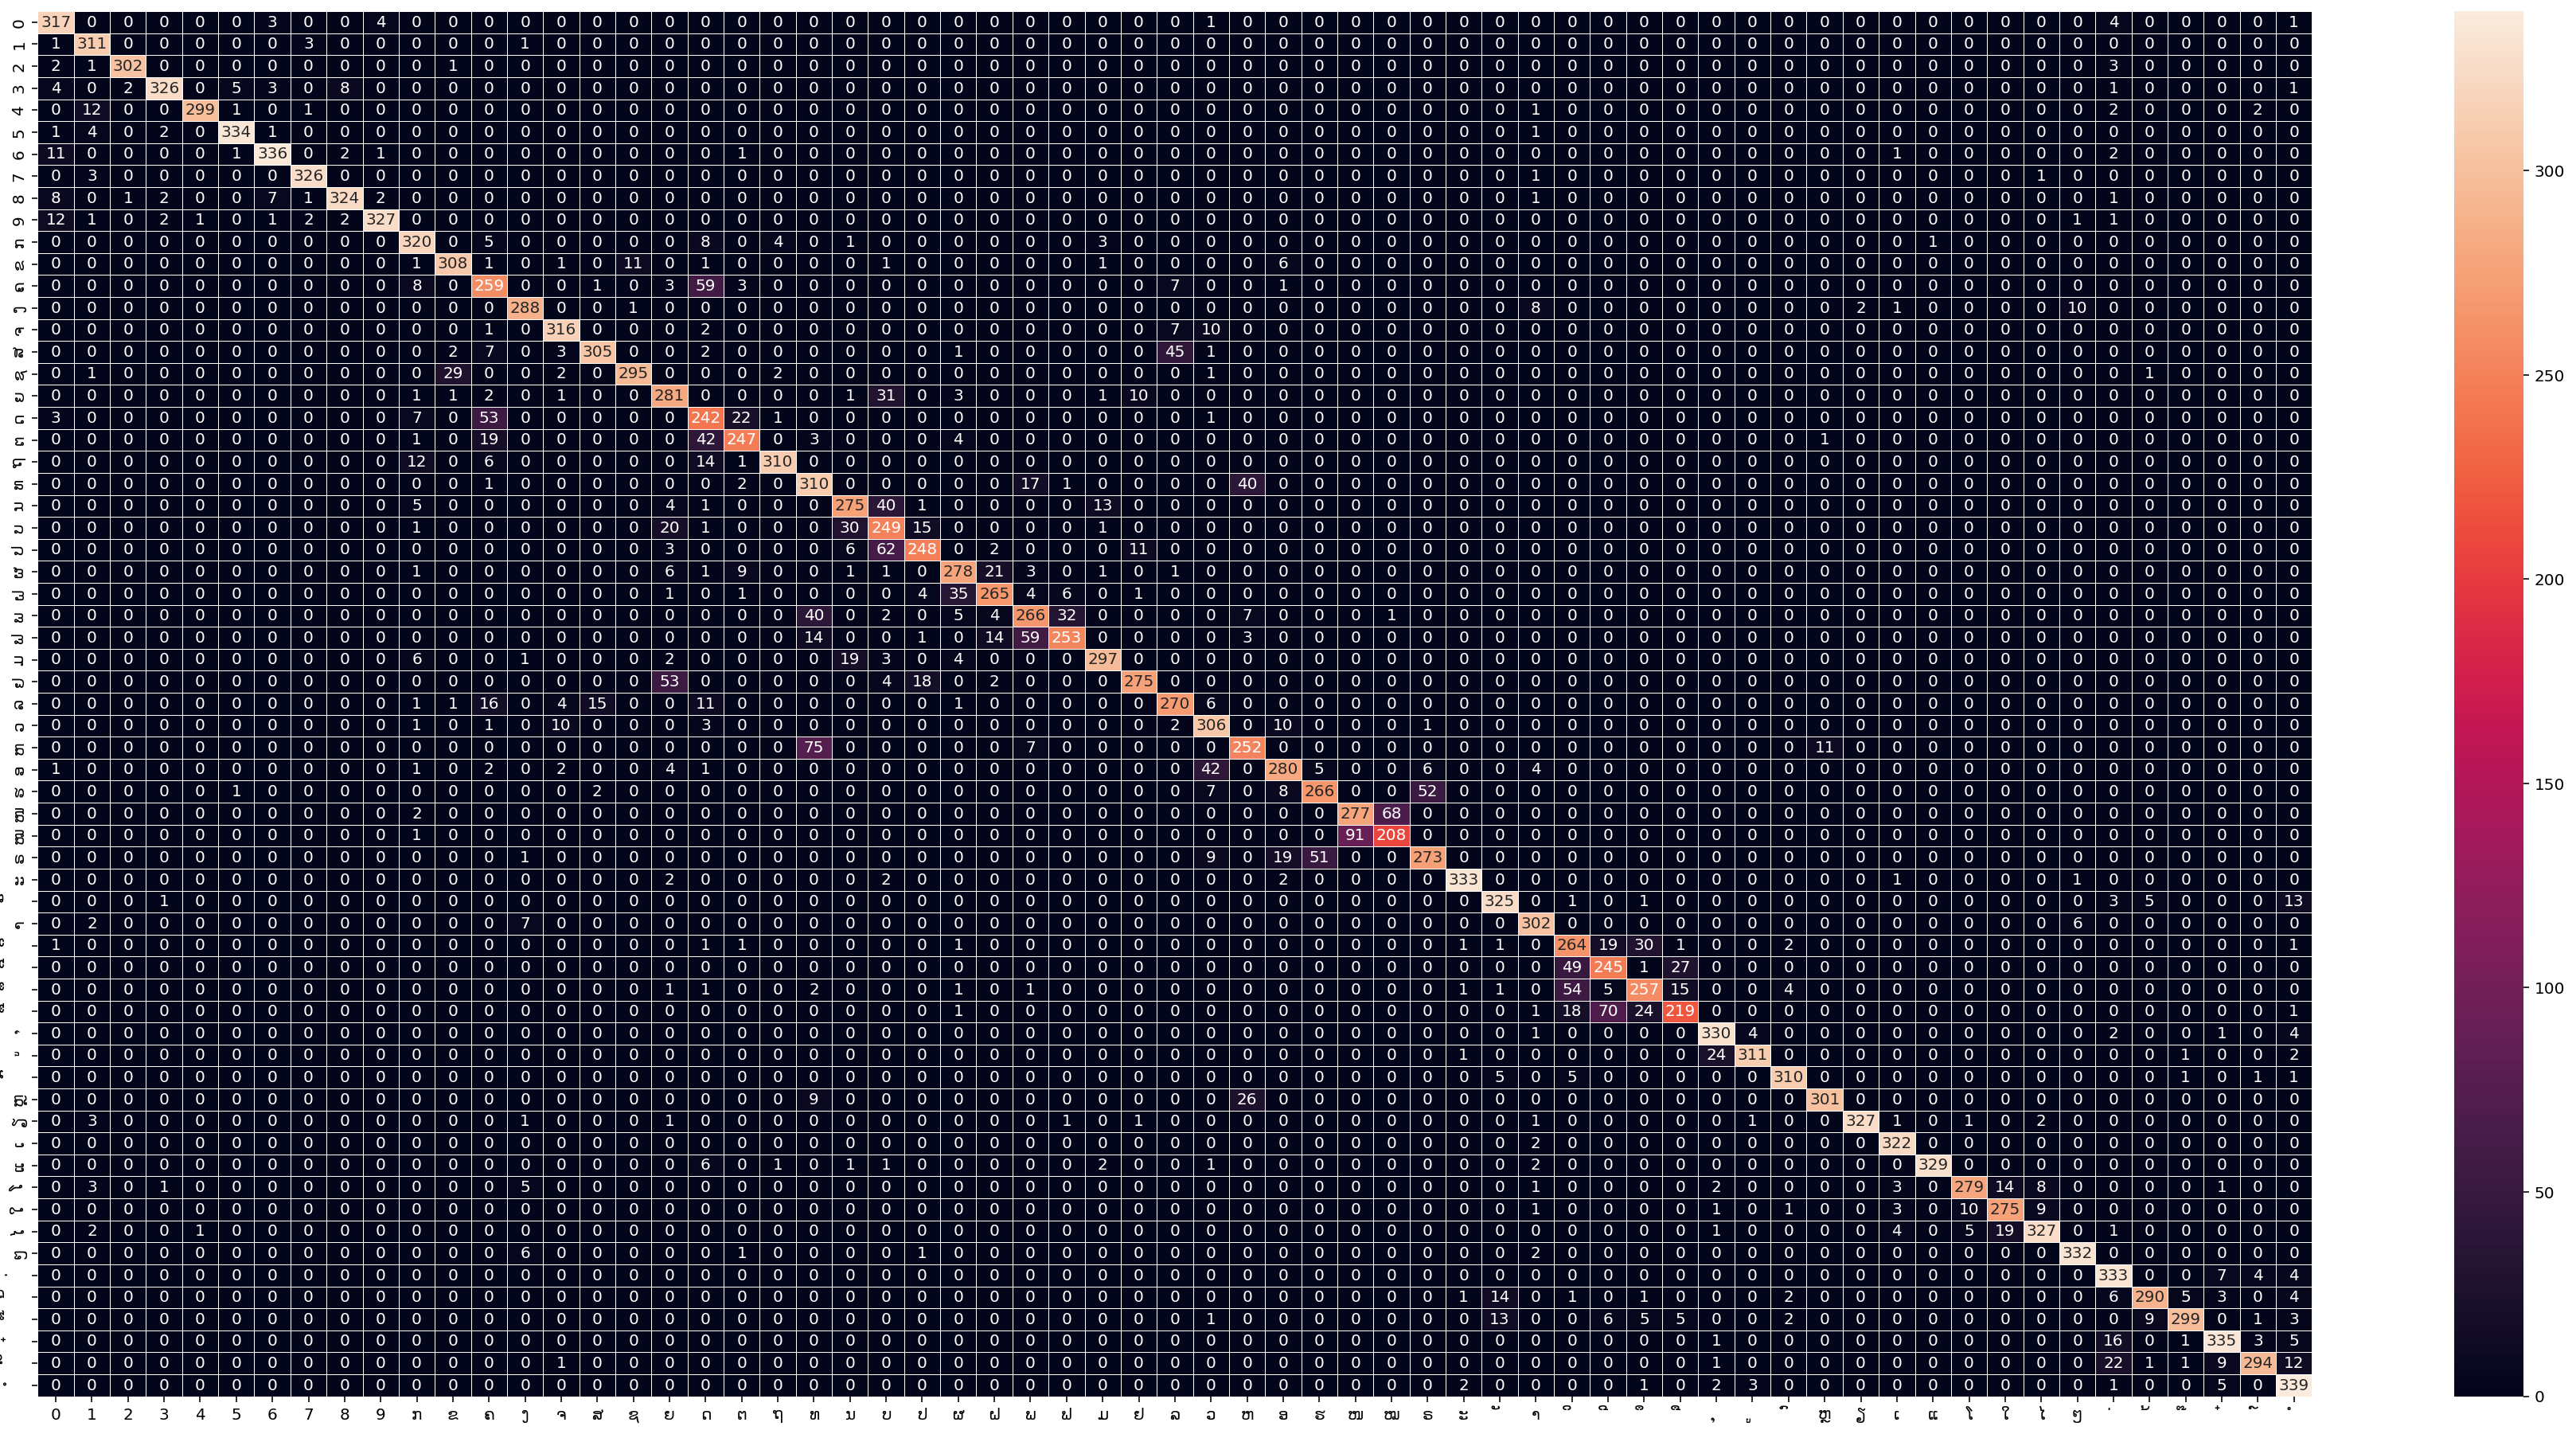

In [25]:
plt.figure(figsize=(32,16))
sns.heatmap(cm_knn, annot=True, fmt='d', linewidths=.5,xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [27]:
from sklearn.metrics import classification_report
print("KNN",classification_report(y_test,y_pred_knn, target_names=CATEGORIES))

KNN               precision    recall  f1-score   support

           0       0.88      0.96      0.92       330
           1       0.91      0.98      0.94       316
           2       0.99      0.98      0.98       309
           3       0.98      0.93      0.95       350
           4       0.99      0.94      0.97       318
           5       0.98      0.97      0.98       343
           6       0.96      0.95      0.95       355
           7       0.98      0.98      0.98       331
           8       0.96      0.93      0.95       347
           9       0.98      0.93      0.96       350
           ກ       0.87      0.94      0.90       342
           ຂ       0.90      0.93      0.92       331
           ຄ       0.69      0.76      0.73       341
           ງ       0.93      0.93      0.93       310
           ຈ       0.93      0.94      0.93       336
           ສ       0.94      0.83      0.89       366
           ຊ       0.96      0.89      0.92       331
           ຍ       0.74

# -------------------------------------

## Linear Regression Model (LogisticRegression Algorithm)

In [28]:
model_lr=LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\Patou\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
y_pred_lr=model_lr.predict(X_test)
print("Accuracy KNN is",accuracy_score(y_test,y_pred_lr))

Accuracy KNN is 0.7139077853363568


In [30]:
cm_lr = confusion_matrix(y_test,y_pred_lr)
cm_lr

array([[292,   0,   0, ...,   0,   0,   6],
       [  0, 298,   0, ...,   0,   0,   0],
       [  0,   7, 293, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 150,  39,  13],
       [  0,   1,   0, ...,  46, 113,   9],
       [  0,   0,   0, ...,  18,   7, 214]], dtype=int64)

<AxesSubplot:>

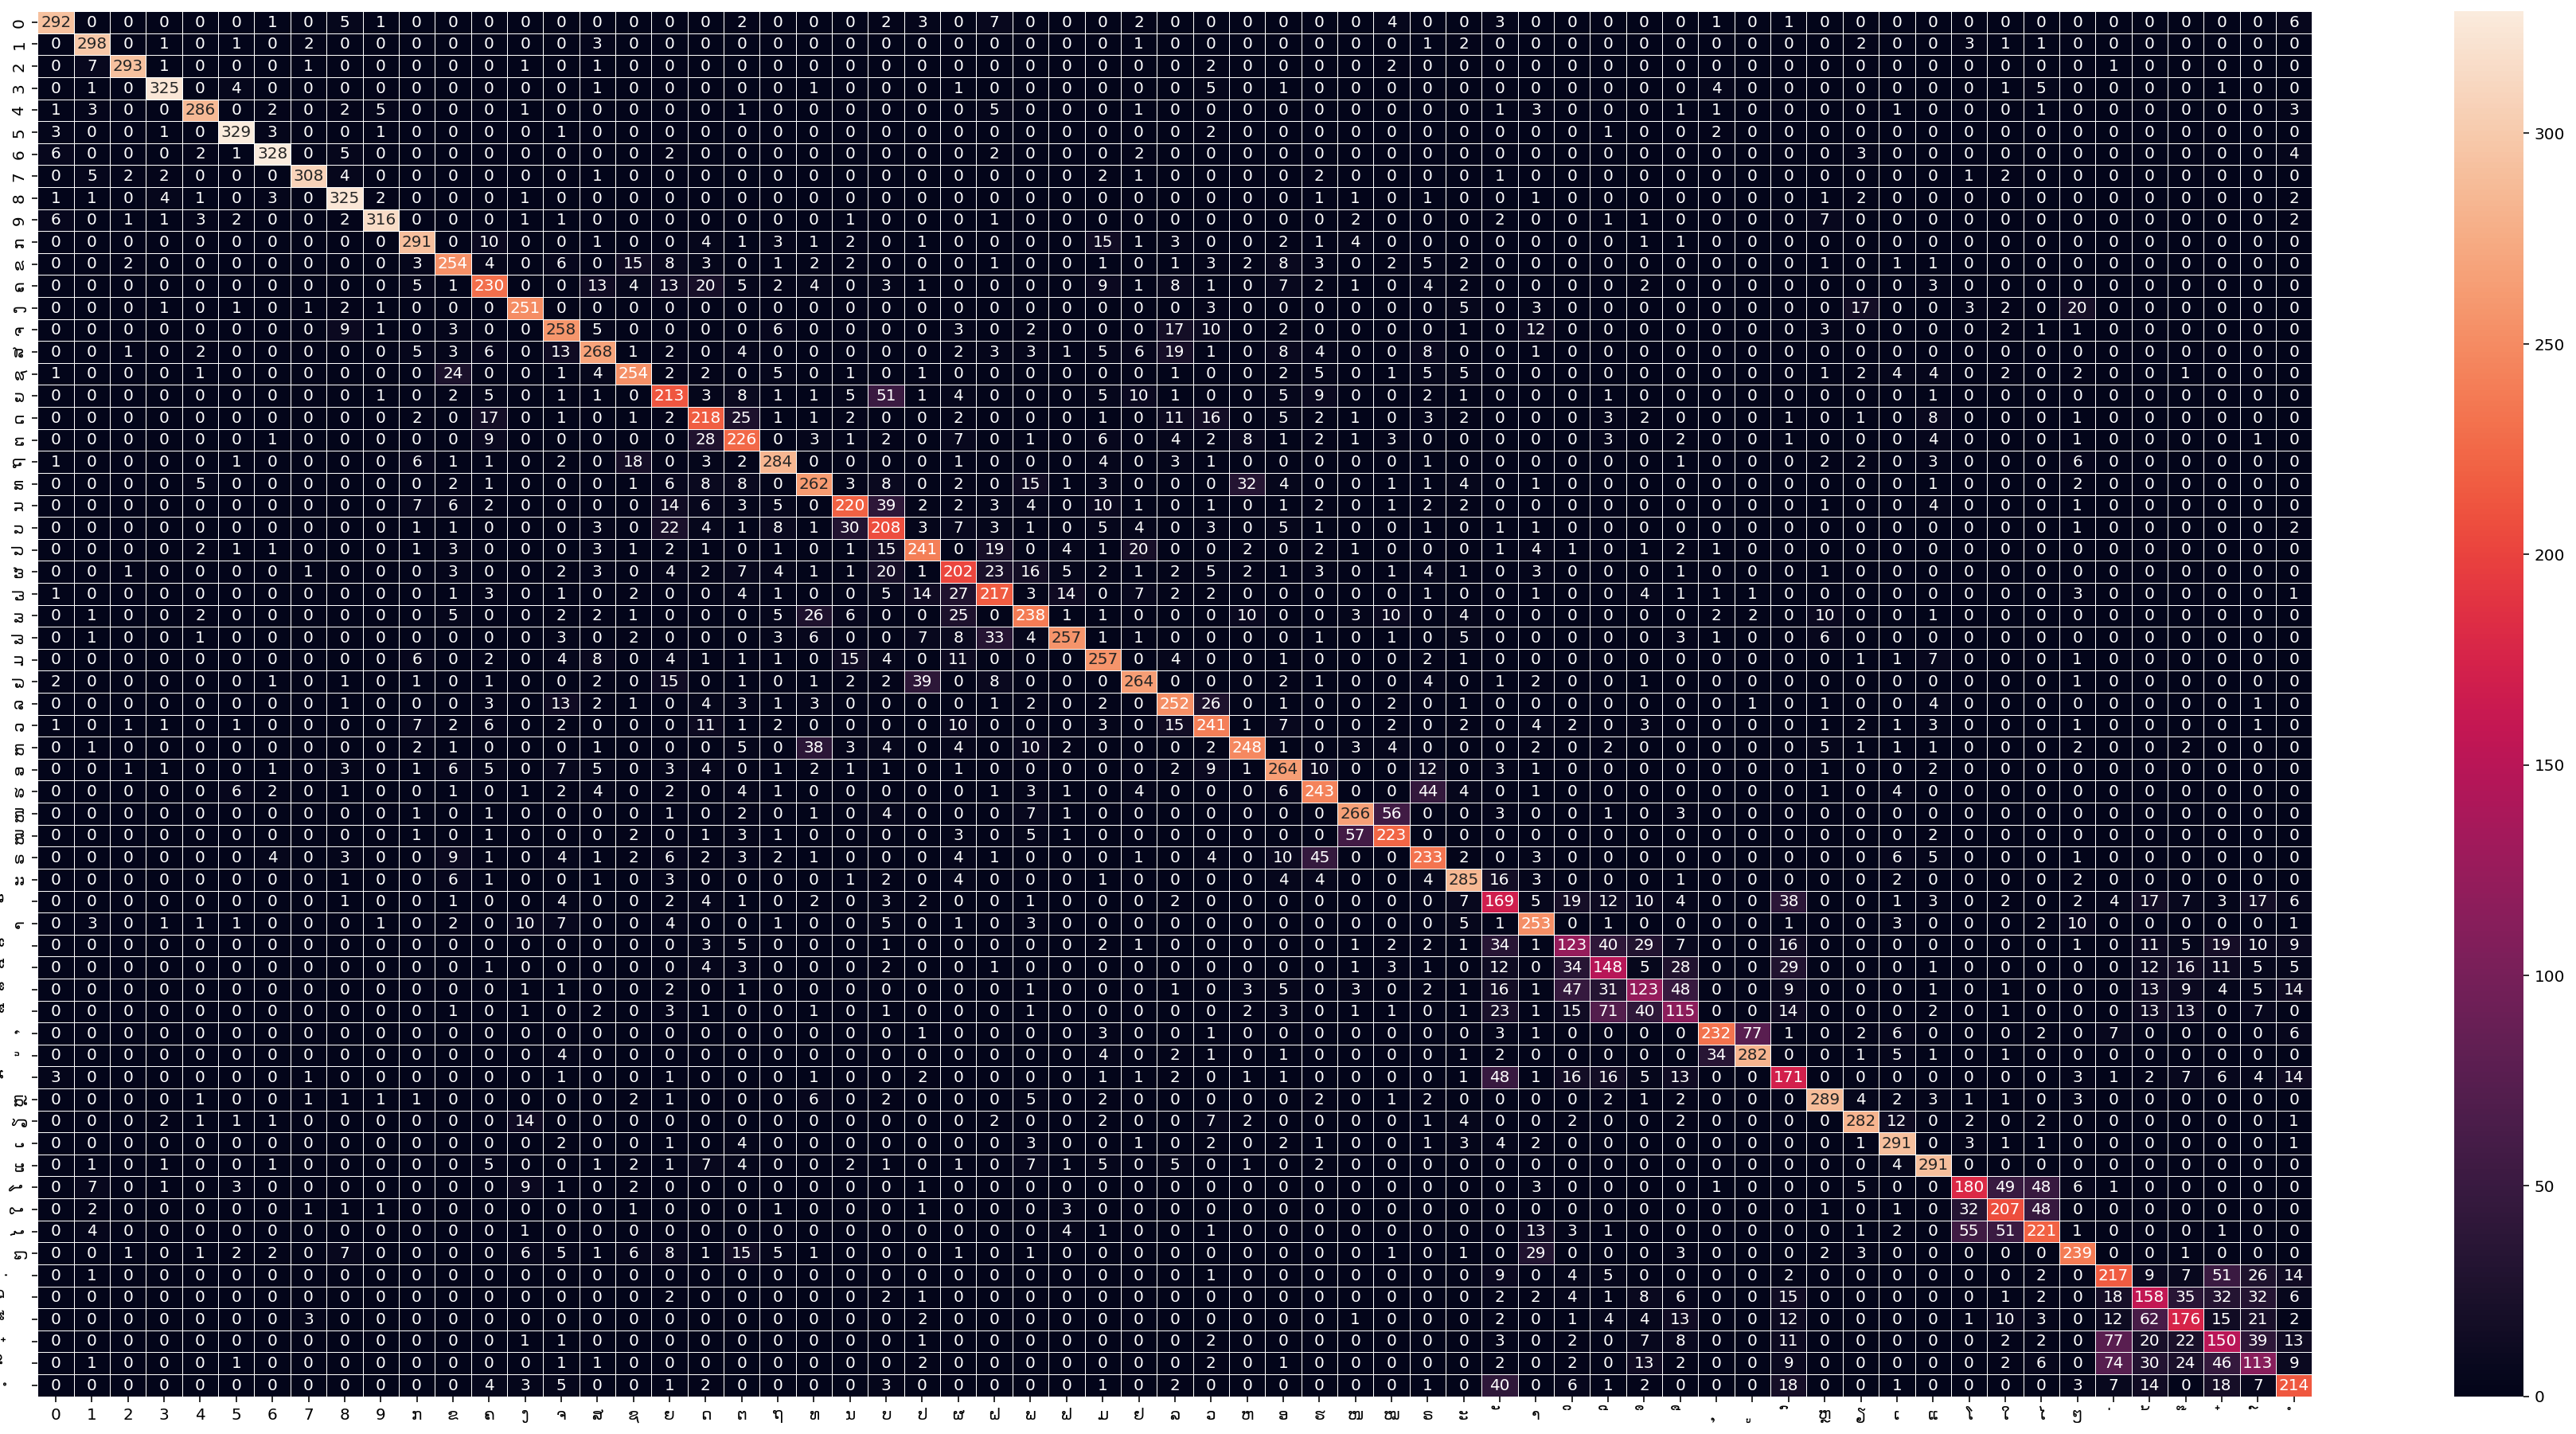

In [31]:
plt.figure(figsize=(32,16))
sns.heatmap(cm_lr, annot=True, fmt='d', linewidths=.5,xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [32]:
print("Linear Regession",classification_report(y_test,y_pred_lr, target_names=CATEGORIES))

Linear Regession               precision    recall  f1-score   support

           0       0.92      0.88      0.90       330
           1       0.88      0.94      0.91       316
           2       0.97      0.95      0.96       309
           3       0.95      0.93      0.94       350
           4       0.93      0.90      0.91       318
           5       0.93      0.96      0.94       343
           6       0.93      0.92      0.93       355
           7       0.97      0.93      0.95       331
           8       0.87      0.94      0.90       347
           9       0.95      0.90      0.93       350
           ກ       0.85      0.85      0.85       342
           ຂ       0.75      0.77      0.76       331
           ຄ       0.72      0.67      0.70       341
           ງ       0.83      0.81      0.82       310
           ຈ       0.72      0.77      0.75       336
           ສ       0.79      0.73      0.76       366
           ຊ       0.80      0.77      0.78       331
          

# ---------------------------------------

## Naive Bayes Model (Gaussian Naive Bayes )

In [33]:
model_nb=GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred_nb=model_nb.predict(X_test)
print("Accuracy KNN is",accuracy_score(y_test,y_pred_nb))

Accuracy KNN is 0.22160808767951626


## GradientBoostingClassifier

In [36]:
model_GBC=GradientBoostingClassifier()
model_GBC.fit(X_train, y_train)

In [ ]:
y_pred_GBC=model_GBC.predict(X_test)
print("Accuracy GBC is",accuracy_score(y_test,y_pred_GBC))

In [ ]:
cm_GBC = confusion_matrix(y_test,y_pred_GBC)
cm_GBC

In [ ]:
plt.figure(figsize=(32,16))
sns.heatmap(cm_GBC, annot=True, fmt='d', linewidths=.5,xticklabels=CATEGORIES, yticklabels=CATEGORIES)

In [ ]:
print("Gradient Boosting",classification_report(y_test,y_pred_GBC, target_names=CATEGORIES))